In [1]:
%matplotlib inline
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})

# Fit a model to the Iris data

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
X[:10, :]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [6]:
X_ss = np.hstack((X[:,0].reshape(-1,1), X[:, 1].reshape(-1,1))) # use just columns 1 and 2

In [7]:
X_ss[:10, :]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1]])

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [9]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
np.unique(y)

array([0, 1, 2])

In [11]:
# make into binary classification, get rid of virginica
print("Number of rows using all the classes: {0}".format(X_ss.shape[0]))
X_b = X_ss[y < 2]
y_b = y[y < 2]
print("Number of rows excluding virginica: {0}".format(X_b.shape[0]))

Number of rows using all the classes: 150
Number of rows excluding virginica: 100


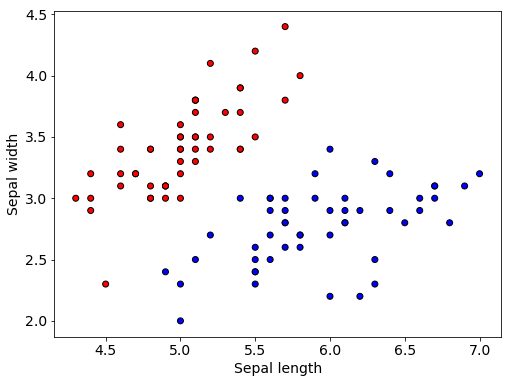

In [12]:
plt.figure(figsize=(8, 6))
color= ['red' if v == 0 else 'blue' for v in y_b]
plt.scatter(X_b[:, 0], X_b[:, 1], c=color, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

In [13]:
# Too easy to classify, subtract value from sepal width so there's more overlap
X_b[y_b==0,1] -= 1

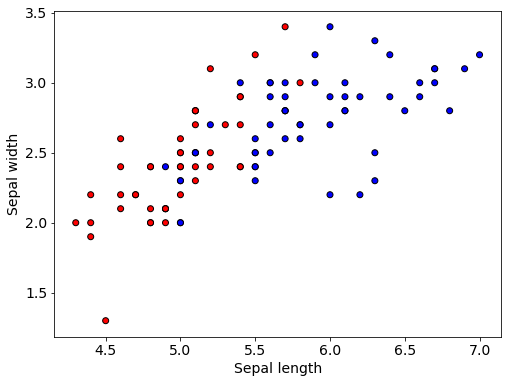

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(X_b[:, 0], X_b[:, 1], c=color, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width');

In [15]:
# A train test split
X_train, X_test, y_train, y_test = train_test_split(
    X_b, y_b, 
    test_size=.5, 
    random_state=1
)

In [16]:
# Create a simple classifier - use a support vector machine
classifier = svm.LinearSVC(random_state=1)
classifier.fit(X_train, y_train)

y_score = classifier.decision_function(X_test) # needed for probabilities
y_hat = classifier.predict(X_test) # predictions

# Calculate accuracy metrics

In [17]:
accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_hat)
precision = metrics.precision_score(y_true=y_test, y_pred=y_hat)
recall = metrics.recall_score(y_true=y_test, y_pred=y_hat)
classification_report= metrics.classification_report(y_true=y_test, y_pred=y_hat)

print('accuracy: {:.3f}'.format(accuracy))
print('precision: {:.3f}'.format(precision))
print('recall: {:.3f}'.format(recall))
print('=========================================================')
print('classification_report: \n{}'.format(classification_report))

accuracy: 0.880
precision: 0.958
recall: 0.821
classification_report: 
             precision    recall  f1-score   support

          0       0.81      0.95      0.88        22
          1       0.96      0.82      0.88        28

avg / total       0.89      0.88      0.88        50



# Precision-Recall Curve

$Precision = \frac {TP}{TP + FP}$  Fraction of retrieved instances that are relevant

$Recall = \frac {TP}{TP + FN}$ Fraction of relevant results retrieved

In [18]:
metrics.precision_recall_curve?

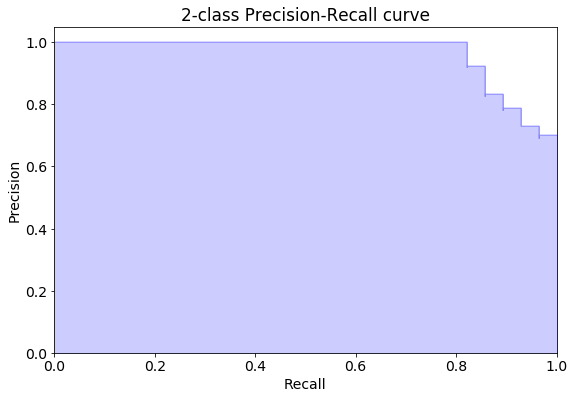

In [19]:
# plot precision-recall curve
# think of class = 1 (versicolor, which is blue) as the positive class
precision, recall, thresholds = metrics.precision_recall_curve(y_true=y_test, probas_pred=y_score)
plt.figure(figsize=(9,6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve');

# Receiver Operating Characteristic (ROC)

$FPR = \frac {FP}{FP + TN}$  False positive rate

$TPR = Recall = \frac {TP}{TP + FN}$ True positive rate

In [20]:
metrics.roc_curve?

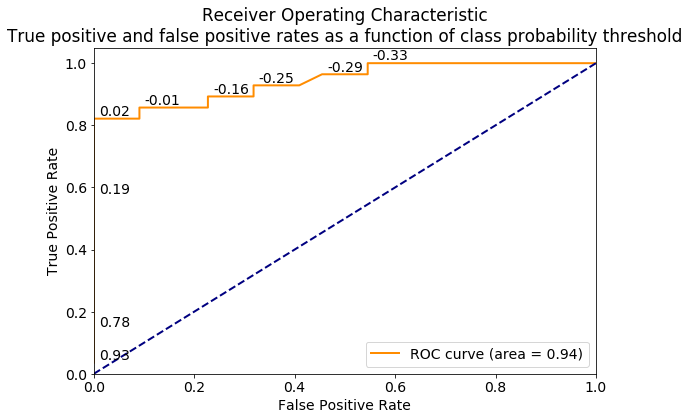

In [21]:
# still thinking of class = 1 (versicolor, which is blue) as the positive class
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_true=y_test, y_score=y_score)
roc_auc = metrics.auc(x=false_positive_rate, y=true_positive_rate)

plt.figure(figsize=(9,6))
lw = 2
plt.plot(false_positive_rate, true_positive_rate, 
         color='darkorange', lw=lw, 
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic\n\
True positive and false positive rates as a function of class probability threshold'
         )
plt.legend(loc="lower right")
[plt.annotate("{:.2f}".format(threshold), xy=(fpr, tpr), xytext=(fpr + 0.01, tpr + 0.01)) \
 for tpr, fpr, threshold in list(zip(true_positive_rate, false_positive_rate, thresholds))[0:-1:2]]
plt.show()